In [29]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

# Create basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a series of random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the list of latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | illoqqortoormiut
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | sakakah
Processing Record 6 of Set 1 | taolanaro
Processing Record 7 of Set 1 | boa vista
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | bonavista
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | opico
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ovalle
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | santa isabel do rio negro
Processing Record 19 of Set 1 | sao jose da coroa grande
Processing Record 20 of Set 1 | plettenberg bay
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | visby
Pr

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | sakakah
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | boa vista
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | bonavista
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | opico
City not found. Skipping...
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ovalle
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | santa isabel do rio negro
Processing Record 19 of Set 1 | sao jose da coroa grande
Processing Record 20 of Set 1 | plettenberg ba

Processing Record 36 of Set 4 | olafsvik
Processing Record 37 of Set 4 | stornoway
Processing Record 38 of Set 4 | honningsvag
Processing Record 39 of Set 4 | saint pete beach
Processing Record 40 of Set 4 | jeremie
Processing Record 41 of Set 4 | sorkjosen
Processing Record 42 of Set 4 | krusevac
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | kuminskiy
Processing Record 45 of Set 4 | nargana
Processing Record 46 of Set 4 | odienne
Processing Record 47 of Set 4 | belmonte
Processing Record 48 of Set 4 | suluq
Processing Record 49 of Set 4 | abalak
Processing Record 50 of Set 4 | menongue
Processing Record 1 of Set 5 | higuey
City not found. Skipping...
Processing Record 2 of Set 5 | conde
Processing Record 3 of Set 5 | sistranda
Processing Record 4 of Set 5 | kautokeino
Processing Record 5 of Set 5 | tingo maria
Processing Record 6 of Set 5 | harlingen
Processing Record 7 of Set 5 | springbok
Processing Record 8 of Set 5 | banfora
Processing Record 9 of S

Processing Record 27 of Set 8 | talnakh
Processing Record 28 of Set 8 | macamic
Processing Record 29 of Set 8 | corinto
Processing Record 30 of Set 8 | sibiti
Processing Record 31 of Set 8 | leon
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | havoysund
Processing Record 34 of Set 8 | kerouane
Processing Record 35 of Set 8 | gazanjyk
Processing Record 36 of Set 8 | dutse
Processing Record 37 of Set 8 | villa maria
Processing Record 38 of Set 8 | gazli
Processing Record 39 of Set 8 | takoradi
Processing Record 40 of Set 8 | calama
Processing Record 41 of Set 8 | lasa
Processing Record 42 of Set 8 | marsaxlokk
Processing Record 43 of Set 8 | kosh-agach
Processing Record 44 of Set 8 | sorland
Processing Record 45 of Set 8 | jequie
Processing Record 46 of Set 8 | saint-pascal
City not found. Skipping...
Processing Record 47 of Set 8 | salym
Processing Record 48 of Set 8 | kaduqli
Processing Record 49 of Set 8 | agadez
Processing Record 50 of Set 8 | bar harbor
Proces

Processing Record 19 of Set 12 | umm kaddadah
Processing Record 20 of Set 12 | bria
Processing Record 21 of Set 12 | grindavik
Processing Record 22 of Set 12 | lucea
Processing Record 23 of Set 12 | bokspits
City not found. Skipping...
Processing Record 24 of Set 12 | badarganj
Processing Record 25 of Set 12 | mrirt
City not found. Skipping...
Processing Record 26 of Set 12 | thompson
Processing Record 27 of Set 12 | balakovo
Processing Record 28 of Set 12 | ajdabiya
Processing Record 29 of Set 12 | nazca
Processing Record 30 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 31 of Set 12 | aden
Processing Record 32 of Set 12 | nosy varika
Processing Record 33 of Set 12 | pisco
Processing Record 34 of Set 12 | gallatin
Processing Record 35 of Set 12 | garlasco
Processing Record 36 of Set 12 | hebertville
City not found. Skipping...
Processing Record 37 of Set 12 | severnoye
Processing Record 38 of Set 12 | peniche
Processing Record 39 of Set 12 | chabahar
Processing Rec

In [8]:
len(city_data)

555

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,28.36,94,98,29.77,RU,2020-10-18 23:39:50
1,Ushuaia,-54.80,-68.30,39.20,80,20,13.87,AR,2020-10-18 23:41:20
2,Hermanus,-34.42,19.23,57.00,89,95,1.99,ZA,2020-10-18 23:42:13
3,Sakakah,29.97,40.21,68.00,16,0,6.46,SA,2020-10-18 23:39:47
4,Boa Vista,2.82,-60.67,89.60,52,31,5.82,BR,2020-10-18 23:42:13
5,Nanortalik,60.14,-45.24,39.74,91,97,12.84,GL,2020-10-18 23:40:04
6,Jamestown,42.10,-79.24,53.01,87,90,8.05,US,2020-10-18 23:42:14
7,Cape Town,-33.93,18.42,60.01,87,84,4.70,ZA,2020-10-18 23:39:23
8,Bonavista,48.65,-53.11,51.01,77,100,13.20,CA,2020-10-18 23:42:14
9,Souillac,-20.52,57.52,73.40,78,40,10.29,MU,2020-10-18 23:39:39


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-10-18 23:39:50,73.51,80.55,28.36,94,98,29.77
1,Ushuaia,AR,2020-10-18 23:41:20,-54.80,-68.30,39.20,80,20,13.87
2,Hermanus,ZA,2020-10-18 23:42:13,-34.42,19.23,57.00,89,95,1.99
3,Sakakah,SA,2020-10-18 23:39:47,29.97,40.21,68.00,16,0,6.46
4,Boa Vista,BR,2020-10-18 23:42:13,2.82,-60.67,89.60,52,31,5.82
5,Nanortalik,GL,2020-10-18 23:40:04,60.14,-45.24,39.74,91,97,12.84
6,Jamestown,US,2020-10-18 23:42:14,42.10,-79.24,53.01,87,90,8.05
7,Cape Town,ZA,2020-10-18 23:39:23,-33.93,18.42,60.01,87,84,4.70
8,Bonavista,CA,2020-10-18 23:42:14,48.65,-53.11,51.01,77,100,13.20
9,Souillac,MU,2020-10-18 23:39:39,-20.52,57.52,73.40,78,40,10.29


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import time module
import time
# Get todays date in seconds
today = time.time()
today

1603065279.0910552

In [15]:
today = time.strftime("%x")
today

'10/18/20'

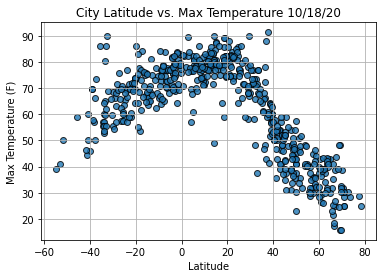

In [16]:
# Build the scatter plot for latitudes vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

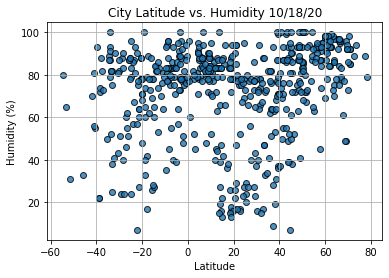

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

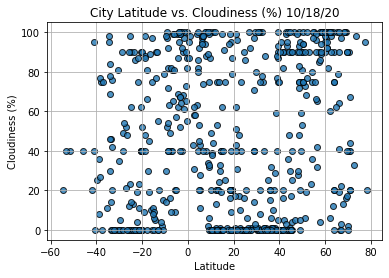

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

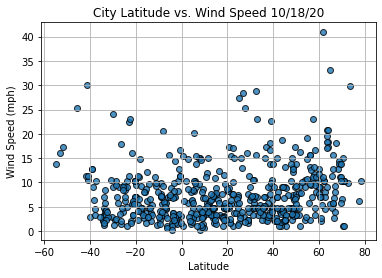

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Create a function to perform a linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_vale, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [45]:
index13 = city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2020-10-18 23:39:25
Lat                         65.61
Lng                        -37.64
Max Temp                       32
Humidity                       92
Cloudiness                     79
Wind Speed                    4.7
Name: 13, dtype: object

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Dikson,RU,2020-10-18 23:39:50,73.51,80.55,28.36,94,98,29.77
3,Sakakah,SA,2020-10-18 23:39:47,29.97,40.21,68.00,16,0,6.46
4,Boa Vista,BR,2020-10-18 23:42:13,2.82,-60.67,89.60,52,31,5.82
5,Nanortalik,GL,2020-10-18 23:40:04,60.14,-45.24,39.74,91,97,12.84
6,Jamestown,US,2020-10-18 23:42:14,42.10,-79.24,53.01,87,90,8.05


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

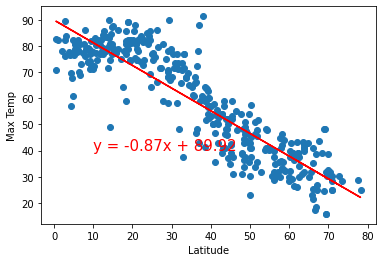

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

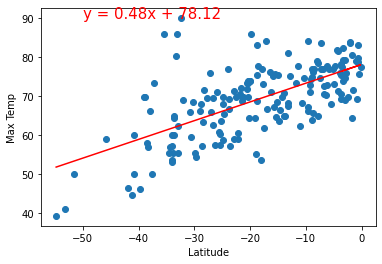

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

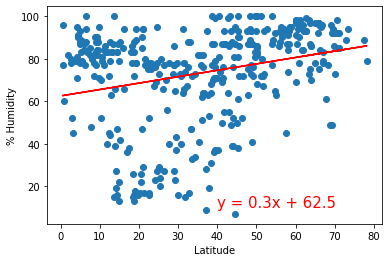

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

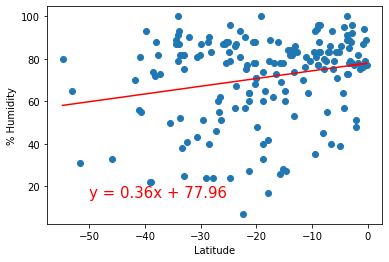

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

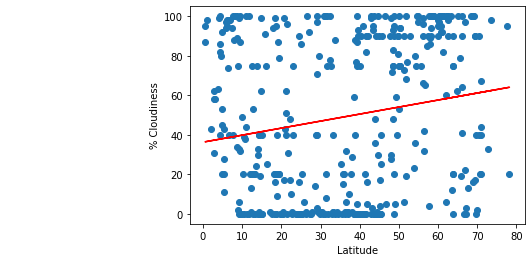

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


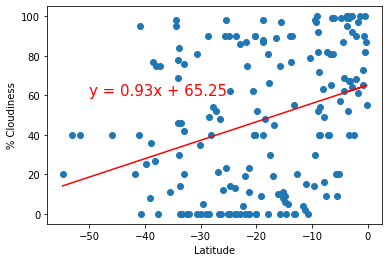

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

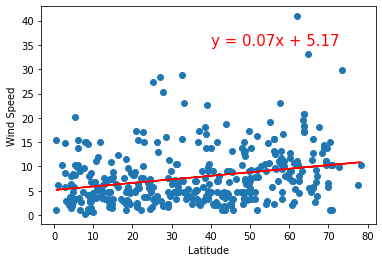

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

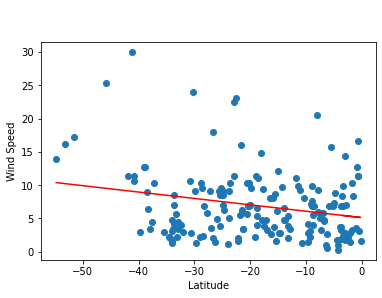

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))